--- 5 Baris Pertama Data ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

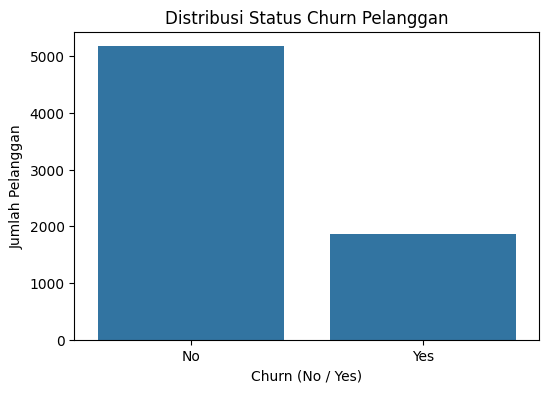

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ganti dengan nama file dataset Anda setelah diunduh dari Kaggle
# Biasanya nama filenya adalah 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") # Ganti nama file jika berbeda

# Menampilkan 5 baris pertama data
print("--- 5 Baris Pertama Data ---")
print(df.head())

# Menampilkan informasi dasar tentang dataset
print("\n--- Info Dataset ---")
print(df.info())

# Penting: Membuat plot distribusi dari variabel target 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Status Churn Pelanggan')
plt.xlabel('Churn (No / Yes)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

*Sekarang bagian TA-05*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib # Untuk menyimpan model

# Muat dataset Anda
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") # Ganti dengan path file Anda

print("Dataset Shape:", df.shape)
print("\nInfo Dataset:")
print(df.info())
print("\n5 Baris Pertama:")
print(df.head())

Dataset Shape: (7043, 21)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


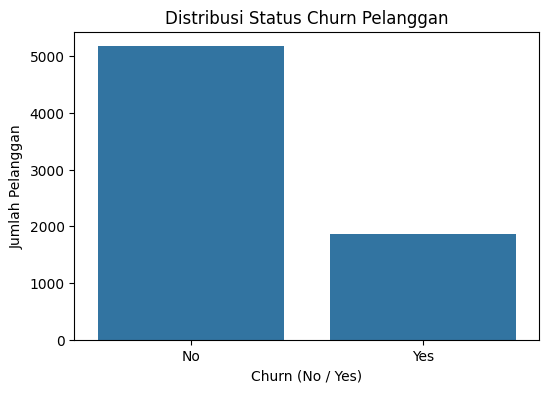

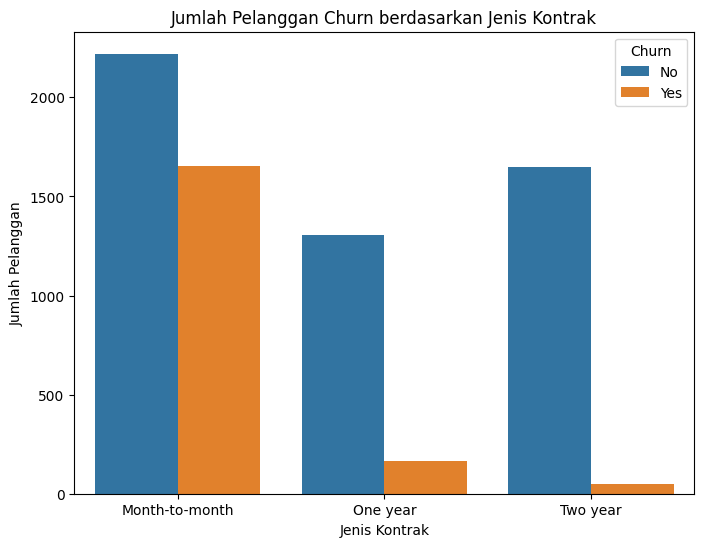

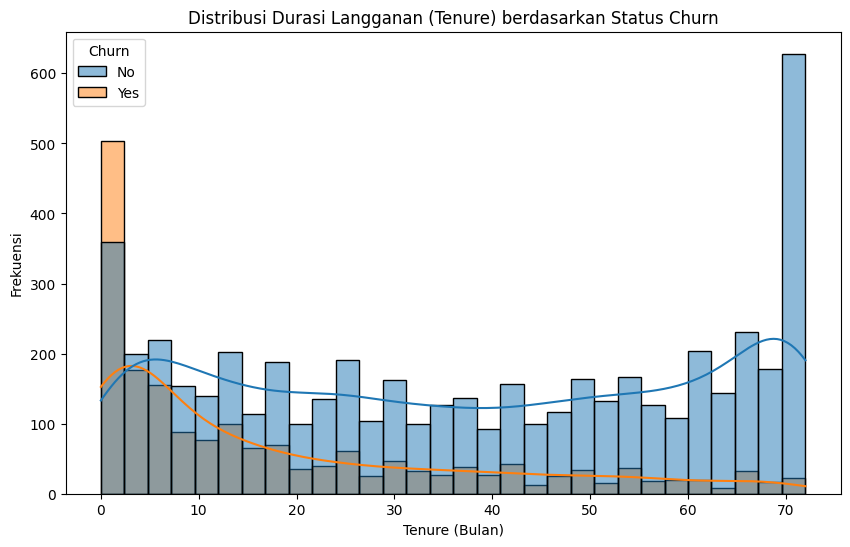

In [4]:
# Periksa nilai yang hilang
print("Missing Values:\n", df.isnull().sum())

# Distribusi Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Status Churn Pelanggan')
plt.xlabel('Churn (No / Yes)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Contoh Visualisasi: Churn berdasarkan Kontrak
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Jumlah Pelanggan Churn berdasarkan Jenis Kontrak')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.show()

# Contoh Visualisasi: Distribusi Tenure berdasarkan Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribusi Durasi Langganan (Tenure) berdasarkan Status Churn')
plt.xlabel('Tenure (Bulan)')
plt.ylabel('Frekuensi')
plt.show()

In [5]:
# Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Periksa kembali nilai hilang setelah konversi
print("Missing Values setelah konversi TotalCharges:\n", df.isnull().sum())

# Drop baris dengan TotalCharges NaN (jika jumlahnya kecil, ini bisa dilakukan)
df.dropna(inplace=True)
print("Dataset Shape setelah drop NaN:", df.shape)

Missing Values setelah konversi TotalCharges:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Dataset Shape setelah drop NaN: (7032, 21)


In [6]:
# Pilih kolom yang bukan target
feature_columns = [col for col in df.columns if col != 'Churn']

# Pisahkan fitur dan target
X = df[feature_columns]
y = df['Churn']

# One-Hot Encoding untuk semua fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True) # drop_first=True untuk menghindari dummy variable trap

print("Shape X setelah One-Hot Encoding:", X_encoded.shape)
print("\nKolom Fitur (X) setelah encoding:")
print(X_encoded.columns.tolist())

# Encode target (Churn) menjadi 0 dan 1
y_encoded = y.map({'No': 0, 'Yes': 1})

print("\nDistribusi y_encoded:")
print(y_encoded.value_counts())

Shape X setelah One-Hot Encoding: (7032, 7061)

Kolom Fitur (X) setelah encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'customerID_0003-MKNFE', 'customerID_0004-TLHLJ', 'customerID_0011-IGKFF', 'customerID_0013-EXCHZ', 'customerID_0013-MHZWF', 'customerID_0013-SMEOE', 'customerID_0014-BMAQU', 'customerID_0015-UOCOJ', 'customerID_0016-QLJIS', 'customerID_0017-DINOC', 'customerID_0017-IUDMW', 'customerID_0018-NYROU', 'customerID_0019-EFAEP', 'customerID_0019-GFNTW', 'customerID_0020-INWCK', 'customerID_0020-JDNXP', 'customerID_0021-IKXGC', 'customerID_0022-TCJCI', 'customerID_0023-HGHWL', 'customerID_0023-UYUPN', 'customerID_0023-XUOPT', 'customerID_0027-KWYKW', 'customerID_0030-FNXPP', 'customerID_0031-PVLZI', 'customerID_0032-PGELS', 'customerID_0036-IHMOT', 'customerID_0040-HALCW', 'customerID_0042-JVWOJ', 'customerID_0042-RLHYP', 'customerID_0048-LUMLS', 'customerID_0048-PIHNL', 'customerID_0052-DCKON', 'customerID_0052-YNYOT', 'customerID_0056-EPFBG', 'custo

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

--- Evaluasi Model A (Overfit Potential) pada Data Latih ---
Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



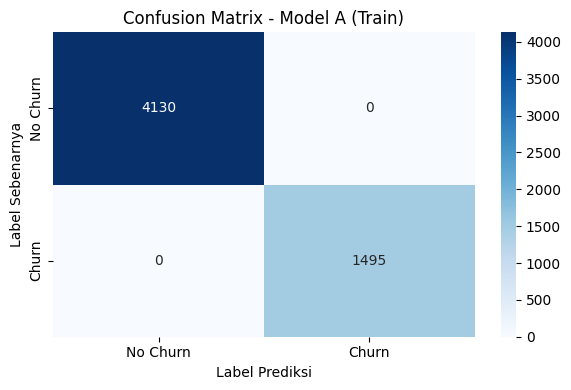

Confusion Matrix Model A (Train) telah disimpan sebagai 'confusion_matrix_model_A_train.png'

--- Evaluasi Model A (Overfit Potential) pada Data Uji ---
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1033
           1       0.52      0.47      0.49       374

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



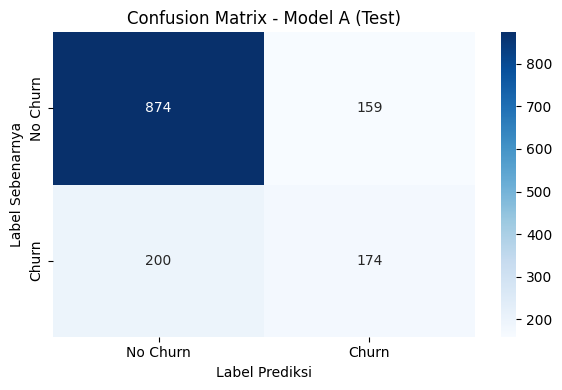

Confusion Matrix Model A (Test) telah disimpan sebagai 'confusion_matrix_model_A_test.png'


In [15]:
# Model A (Potensi Overfit)
model_A = DecisionTreeClassifier(random_state=42) # max_depth=None secara default
model_A.fit(X_train, y_train)

# Evaluasi Model A
train_pred_A = model_A.predict(X_train)
test_pred_A = model_A.predict(X_test)

print("--- Evaluasi Model A (Overfit Potential) pada Data Latih ---")
print("Classification Report (Train):")
print(classification_report(y_train, train_pred_A))

# Simpan dan Tampilkan Confusion Matrix Model A - Data Latih
cm_train_A = confusion_matrix(y_train, train_pred_A)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_A, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Model A (Train)')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.tight_layout()
plt.savefig('confusion_matrix_model_A_train.png', dpi=150, bbox_inches='tight') # Simpan sebagai PNG
plt.show() # Tampilkan di output notebook
plt.close() # Tutup plot untuk menghemat memori
print("Confusion Matrix Model A (Train) telah disimpan sebagai 'confusion_matrix_model_A_train.png'")

print("\n--- Evaluasi Model A (Overfit Potential) pada Data Uji ---")
print("Classification Report (Test):")
print(classification_report(y_test, test_pred_A))

# Simpan dan Tampilkan Confusion Matrix Model A - Data Uji
cm_test_A = confusion_matrix(y_test, test_pred_A)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_A, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Model A (Test)')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.tight_layout()
plt.savefig('confusion_matrix_model_A_test.png', dpi=150, bbox_inches='tight') # Simpan sebagai PNG
plt.show() # Tampilkan di output notebook
plt.close()
print("Confusion Matrix Model A (Test) telah disimpan sebagai 'confusion_matrix_model_A_test.png'")



--- Evaluasi Model B (Pruned, max_depth=3) pada Data Latih ---
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4130
           1       0.69      0.40      0.50      1495

    accuracy                           0.79      5625
   macro avg       0.75      0.66      0.68      5625
weighted avg       0.78      0.79      0.77      5625



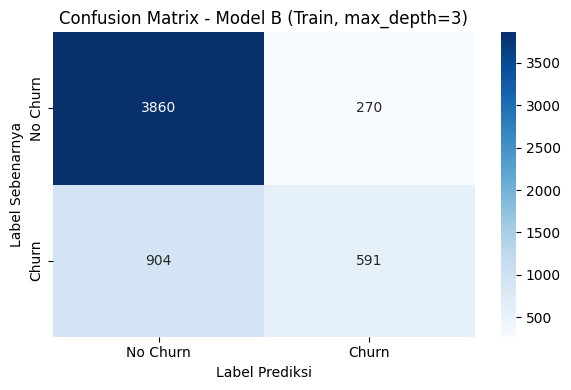

Confusion Matrix Model B (Train) telah disimpan sebagai 'confusion_matrix_model_B_train.png'

--- Evaluasi Model B (Pruned, max_depth=3) pada Data Uji ---
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.66      0.40      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



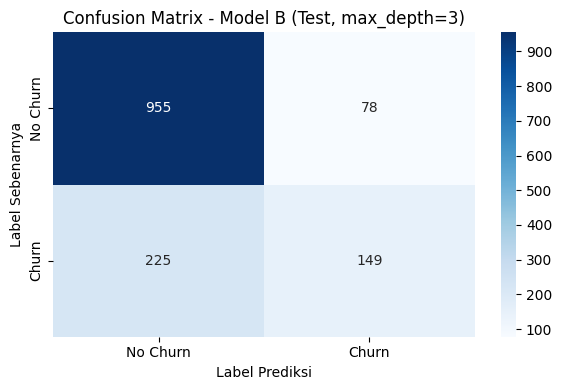

Confusion Matrix Model B (Test) telah disimpan sebagai 'confusion_matrix_model_B_test.png'


In [16]:

# Model B (Di-Pruning)
model_B = DecisionTreeClassifier(max_depth=3, random_state=42)
model_B.fit(X_train, y_train)

# Evaluasi Model B
train_pred_B = model_B.predict(X_train)
test_pred_B = model_B.predict(X_test)

print("\n--- Evaluasi Model B (Pruned, max_depth=3) pada Data Latih ---")
print("Classification Report (Train):")
print(classification_report(y_train, train_pred_B))

# Simpan dan Tampilkan Confusion Matrix Model B - Data Latih
cm_train_B = confusion_matrix(y_train, train_pred_B)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_B, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Model B (Train, max_depth=3)')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.tight_layout()
plt.savefig('confusion_matrix_model_B_train.png', dpi=150, bbox_inches='tight') # Simpan sebagai PNG
plt.show() # Tampilkan di output notebook
plt.close()
print("Confusion Matrix Model B (Train) telah disimpan sebagai 'confusion_matrix_model_B_train.png'")

print("\n--- Evaluasi Model B (Pruned, max_depth=3) pada Data Uji ---")
print("Classification Report (Test):")
print(classification_report(y_test, test_pred_B))

# Simpan dan Tampilkan Confusion Matrix Model B - Data Uji
cm_test_B = confusion_matrix(y_test, test_pred_B)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_B, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Model B (Test, max_depth=3)')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.tight_layout()
plt.savefig('confusion_matrix_model_B_test.png', dpi=150, bbox_inches='tight') # Simpan sebagai PNG
plt.show() # Tampilkan di output notebook
plt.close()
print("Confusion Matrix Model B (Test) telah disimpan sebagai 'confusion_matrix_model_B_test.png'")

# --- Bagian Sisanya (Langkah 4, 5, 6, 7) ---
# ... (kode untuk ROC, Visualisasi Pohon, Feature Importance, Simpan Model, dll.) ...

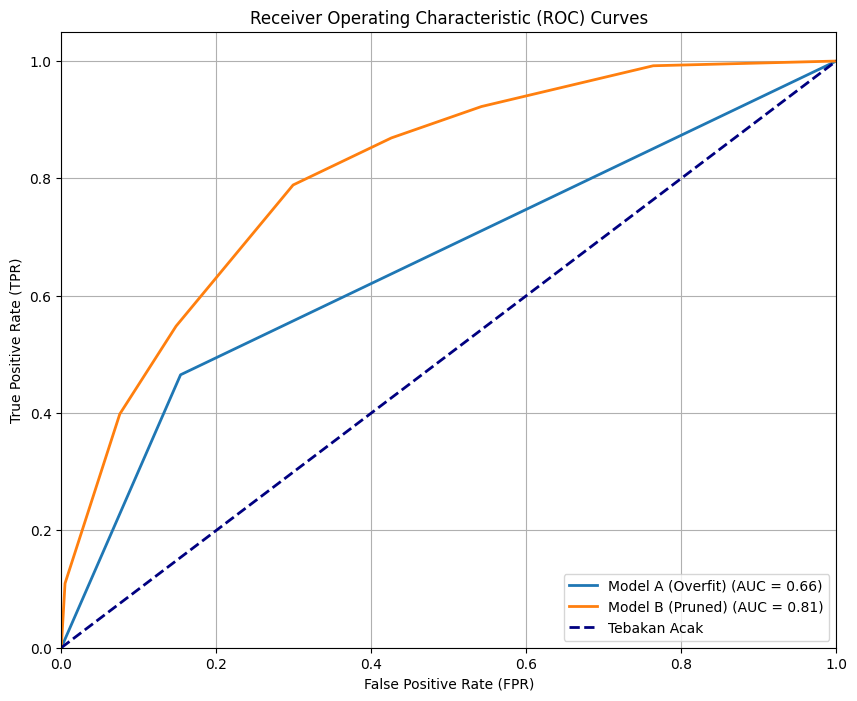

In [10]:
# Fungsi untuk menghitung dan memplot ROC
def plot_roc(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))
plot_roc(model_A, X_test, y_test, 'Model A (Overfit)')
plot_roc(model_B, X_test, y_test, 'Model B (Pruned)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

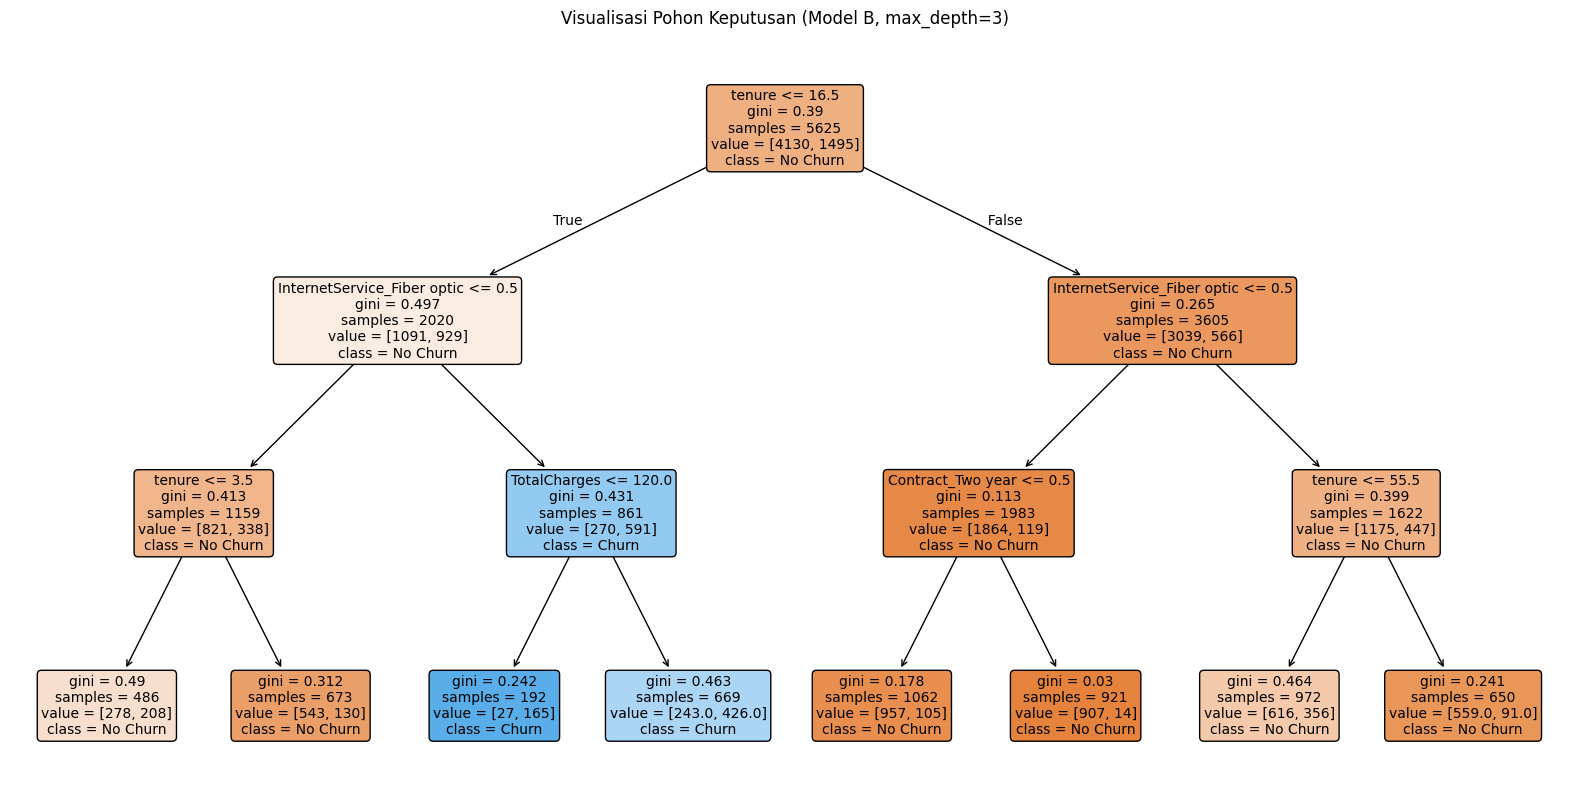

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(model_B,
          feature_names=X_encoded.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visualisasi Pohon Keputusan (Model B, max_depth=3)")
plt.show()

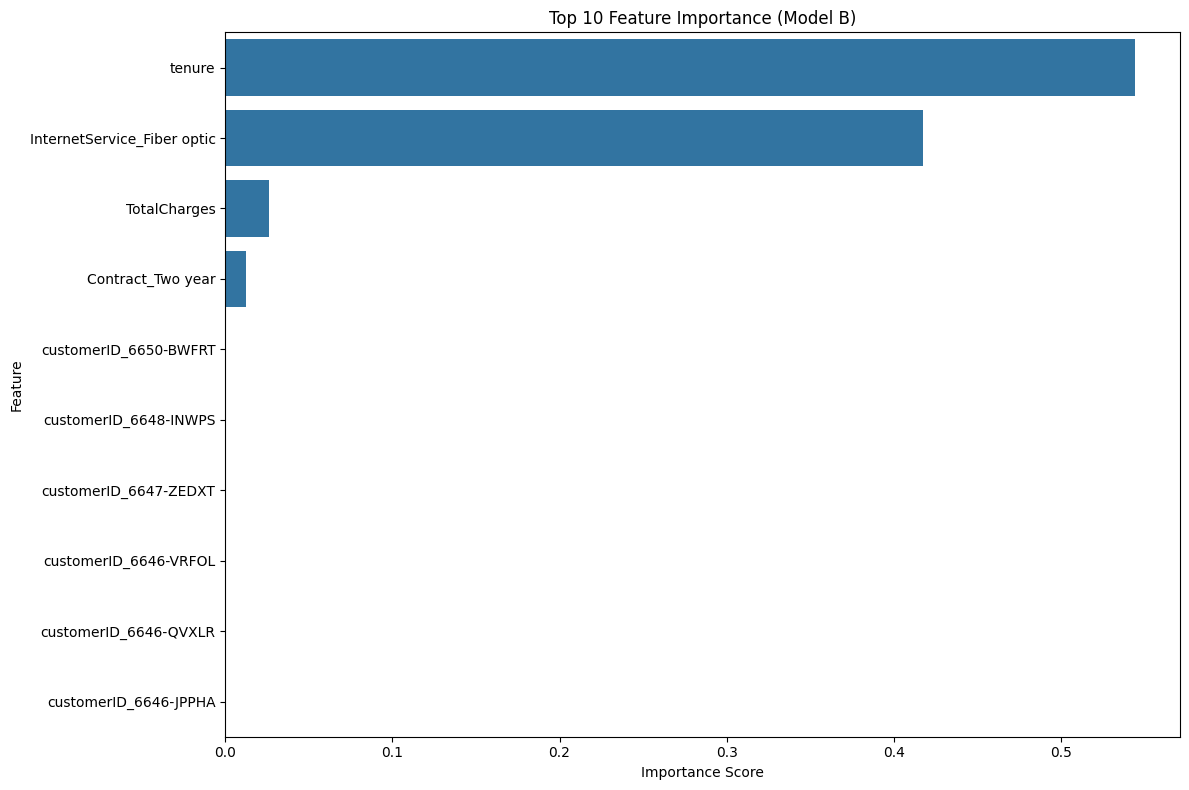


Top 10 Feature Importance (Model B):
                          Feature  Importance
1                          tenure    0.544034
7041  InternetService_Fiber optic    0.417721
3                    TotalCharges    0.026069
7056            Contract_Two year    0.012176
4713        customerID_6650-BWFRT    0.000000
4712        customerID_6648-INWPS    0.000000
4711        customerID_6647-ZEDXT    0.000000
4710        customerID_6646-VRFOL    0.000000
4709        customerID_6646-QVXLR    0.000000
4708        customerID_6646-JPPHA    0.000000


In [12]:
# Ambil feature importance dari Model B
importances = model_B.feature_importances_
feature_names = X_encoded.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10)) # Tampilkan 10 teratas
plt.title('Top 10 Feature Importance (Model B)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Tampilkan juga dalam bentuk tabel
print("\nTop 10 Feature Importance (Model B):")
print(feature_importance_df.head(10))

In [13]:
# Simpan model
joblib.dump(model_B, 'model_churn_pruned.pkl')
print("Model B (Pruned) telah disimpan sebagai 'model_churn_pruned.pkl'")

# Simpan juga fitur yang digunakan untuk referensi saat deployment
with open('feature_names.txt', 'w') as f:
    for name in X_encoded.columns:
        f.write(f"{name}\n")
print("Nama fitur telah disimpan sebagai 'feature_names.txt'")

Model B (Pruned) telah disimpan sebagai 'model_churn_pruned.pkl'
Nama fitur telah disimpan sebagai 'feature_names.txt'
